# Mnist lab 

## Option 1: Using standard python libraries and using the csv dataset
## Option 2: Using tensorflow + keras (to review)

## Option 1: 
### Set the environment
1. Create the working directory called "sciencedonnees" based on the user's home
2. Download the mnist dataset in csv format.  it is also possible to download the original dataset from http://yann.lecun.com/exdb/mnist/ (gz files) and then convert the files to csv 

In [1]:
import urllib.request
import os
import csv

In [2]:
def set_environment(workpath, urls, files):
    ''' function to set the working directory, if it does not exist, 
        it will create it, and download the dataset'''
    if not os.path.exists(workpath):
        os.makedirs(workpath)
        
    for key, value in files.items():
        file_name = workpath+value
        print ('Downloading file: %s to %s %s' % (urls[key], file_name, '\n'))
        if os.path.isfile(file_name):
            print ('Skipping as %s already exist in %s %s' % (value, file_name, '\n') )
        else:
            download_file(urls[key], workpath+value)
            print ('done'+'\n')
    
        
def download_file(f_url,f_dest):
    '''function to download any file'''
    urllib.request.urlretrieve(f_url, f_dest)

#### If we want to use the original dataset, we can do it be defining the urls and files dictionaries as follows:

```python
urls={'train_images':'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz',
      'train_labels':'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz',
      'test_images':'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz',
      'test_labels':'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz'}

files = {'train_images':'train-images-idx3-ubyte.gz',
         'train_labels':'train-labels-idx1-ubyte.gz',
         'test_images':'t10k-images-idx3-ubyte.gz',
         'test_labels':'t10k-labels-idx1-ubyte.gz'}
```

In [3]:
HOMEPATH = os.path.expanduser('~')
workpath = HOMEPATH+'/sciencedonnees/'
urls = {'train':'https://pjreddie.com/media/files/mnist_train.csv', 
        'test':'https://pjreddie.com/media/files/mnist_test.csv'}

files = {'train':'mnist_train.csv', 'test':'mnist_test.csv'}

set_environment(workpath, urls, files)


Skipping as mnist_train.csv already exist in /home/diego/sciencedonnees/mnist_train.csv 


Skipping as mnist_test.csv already exist in /home/diego/sciencedonnees/mnist_test.csv 



In [4]:
# Open train dataset, read it and store records to list
with open(workpath+files['train']) as mnistfile:
    mnistds = csv.reader(mnistfile)
    #next(mnistds, None) # skip the header (if needed)
    records = []
    
    for line in mnistds:
        #records.append(line)
        records.append([int(i) for i in line]) # list comprehension to convert lists' strings to ints on the fly
    print (records[0]) 

[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 18, 18, 18, 126, 136, 175, 26, 166, 255, 247, 127, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 36, 94, 154, 170, 253, 253, 253, 253, 253, 225, 172, 253, 242, 195, 64, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 49, 238, 253, 253, 253, 253, 253, 253, 253, 253, 251, 93, 82, 82, 56, 39, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 219, 253, 253, 253, 253, 253, 198, 182, 247, 241, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80, 156, 107, 253, 253, 205, 11, 0, 43, 154, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 1, 154, 253, 90, 

#### Input test:  
1. Print the first 3 labels
2. Plot the first 3 entries in the training set to validate they match the labels

In [6]:
# separate col(0) - label from the rest of the list
label = []
trainset = []

for line in records:
    label.append(line[0])

for line in records:
    trainset.append(line[1:])

for i in range(0,3):
    print (label[i])
#print (trainset[0])

5
0
4


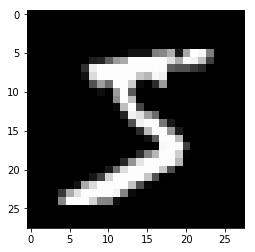

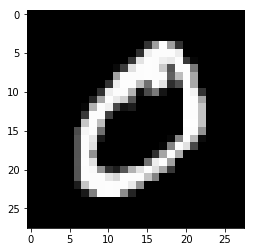

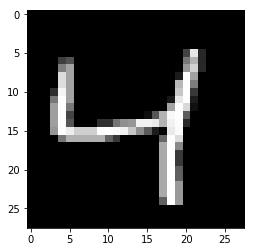

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#reshape gives a new shape to an array without changing its data.
for i in range(0,3):
    trainsetmtx = np.reshape(trainset[i], (28,28))
    imgplot = plt.imshow(trainsetmtx, cmap='gray')
    plt.show()